In [2]:
using Test
using OffsetArrays
using JLD2
using Plots
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../src/dbg_tools.jl")

improve_χ_trace! (generic function with 1 method)

In [9]:
Nν_shell = 50
testf = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1.jld2"#"../test/test_data/ED_s1.jld2"
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
n_iω = trunc(Int, size(χsp,3)/2);

# Spin Channel Tests

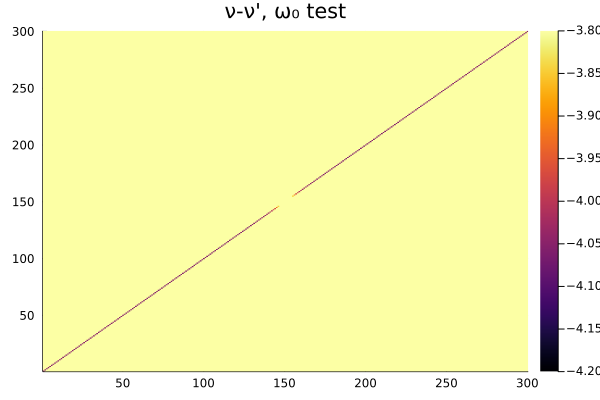

In [13]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 101
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = -U  - U^2 * real(sum(χsp[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += (U^2/2) * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += - (U^2/2) * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-4.2,-3.8), title="ν-ν', ω₀ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

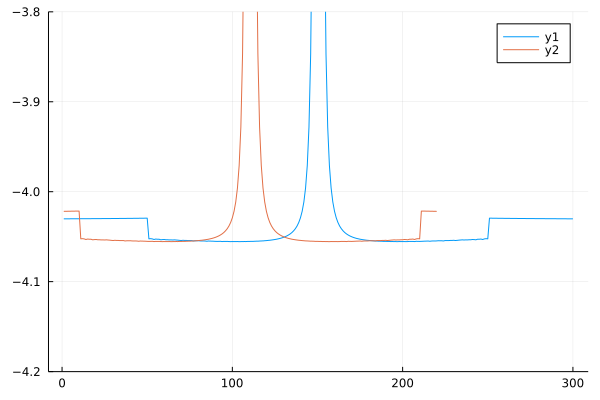

In [16]:
using LinearAlgebra
#Fsp_shell10
plot(real.(diag(Fsp_tr[end])),ylims=(-4.2,-3.8))
plot!(real.(diag(Fsp_shell10)),ylims=(-4.2,-3.8))

In [22]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = -U  - U^2 * real(sum(χsp[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2/2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += - U^2/2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-3.0,-1.3), title="ν-ν', ω₁ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

LoadError: UndefVarError: testf not defined

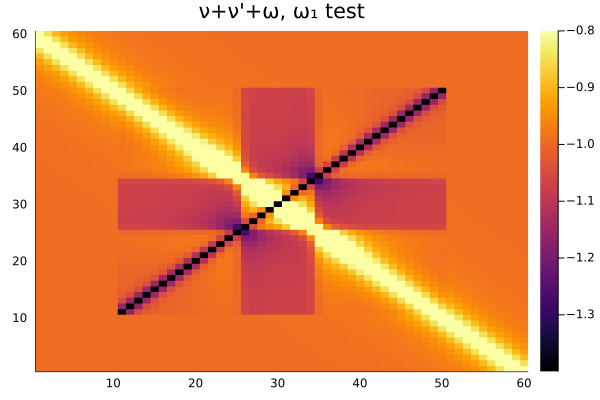

In [76]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 30
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 *  real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-1.4,-0.8), title="ν+ν'+ω, ω₁ test")

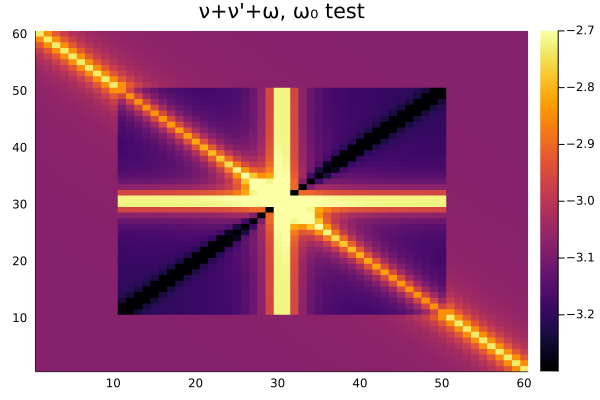

In [78]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 *real(helper.χpp_asympt[ll2[i]])
end
p = if ωi == 22
    heatmap(test, clim=(-1.3,-1.2), title="ν+ν'+ω, ω₀ test") #(-3.3,-2.7)
else
    heatmap(test, clim=(-3.3,-2.7), title="ν+ν'+ω, ω₀ test")
end
display(p)

# Charge Channel Test

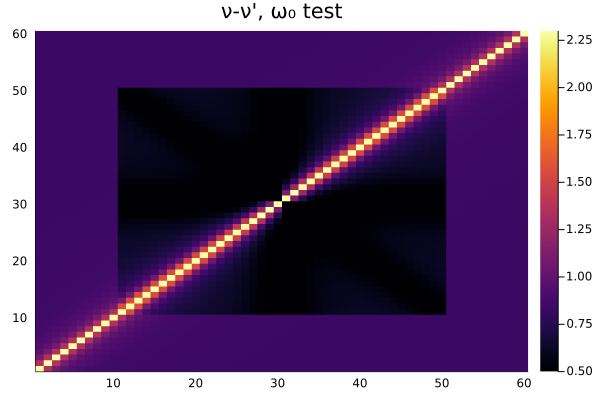

In [79]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 21
i_ch, Fch_tr, χch_tr,χchLoc_tr,λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fch_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = U  - U^2/2 * real(sum(χch[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += (3/2)* U^2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(0.5,2.3), title="ν-ν', ω₀ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

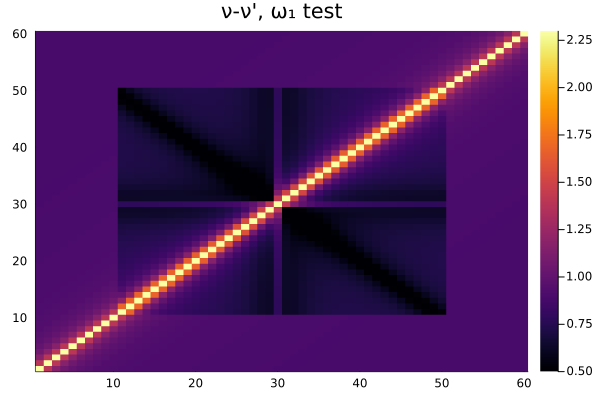

In [80]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 22
i_ch, Fch_tr, χch_tr,χcgLoc_tr,λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fch_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = U  - U^2/2 * real(sum(χch[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += 2*U^2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += U^2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(0.5,2.3), title="ν-ν', ω₁ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

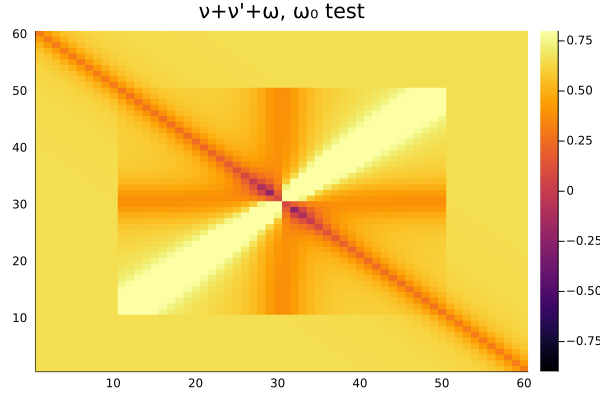

In [81]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  U - U^2 * real(sum(χch[:,:,ωi])/β^2)  - U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-0.9,0.8), title="ν+ν'+ω, ω₀ test")

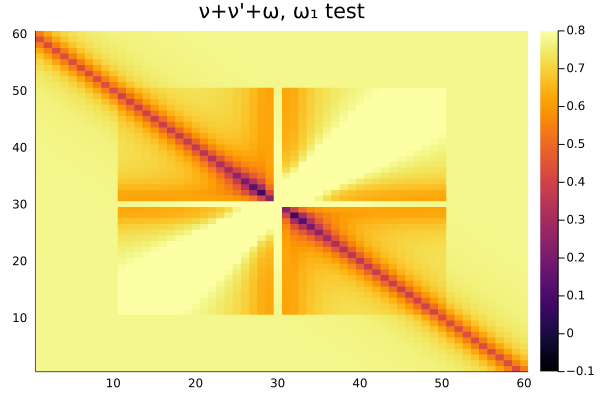

In [82]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  U - U^2 * real(sum(χch[:,:,ωi])/β^2)  - U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-0.1,0.8), title="ν+ν'+ω, ω₁ test")

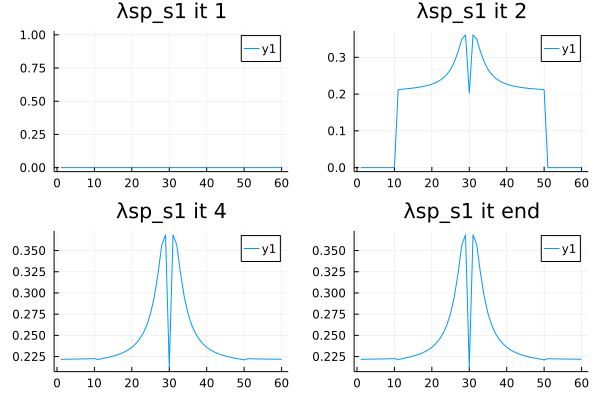

In [83]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λsp_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λsp_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λsp_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λsp_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

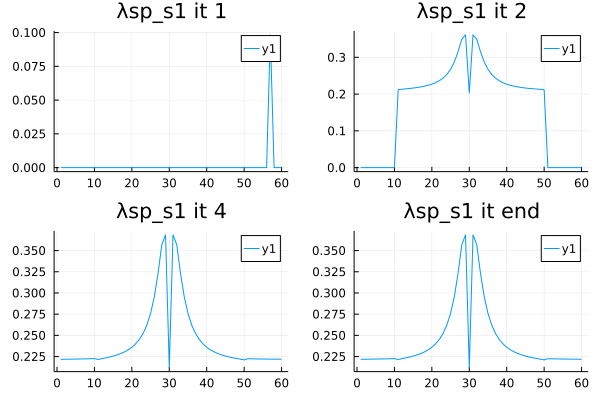

In [84]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

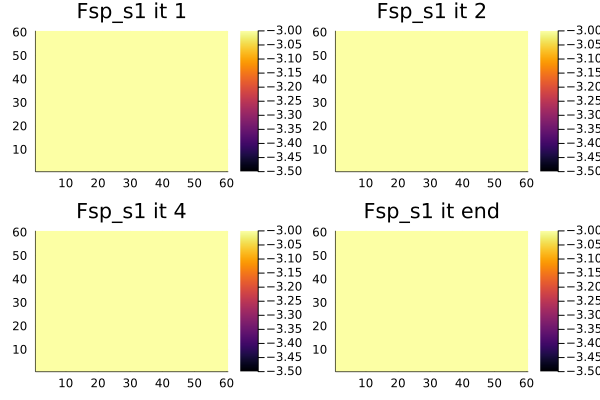

In [85]:
clim = (-3.5,-3.0)#(-3.5,-2.5)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s1 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s1 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[4]), title="Fsp_s1 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

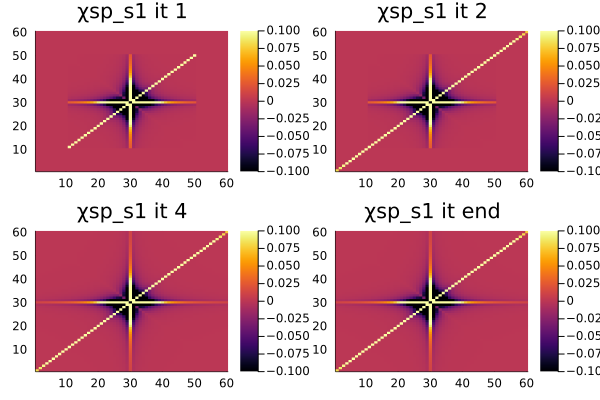

In [86]:
clim = (-0.1,0.1)
p1 = heatmap(real.(χsp_tr[1]), title="χsp_s1 it 1",clim=clim)
p2 = heatmap(real.(χsp_tr[2]), title="χsp_s1 it 2",clim=clim)
p3 = heatmap(real.(χsp_tr[4]), title="χsp_s1 it 4",clim=clim)
p4 = heatmap(real.(χsp_tr[end]), title="χsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

# Full Convergence Tests

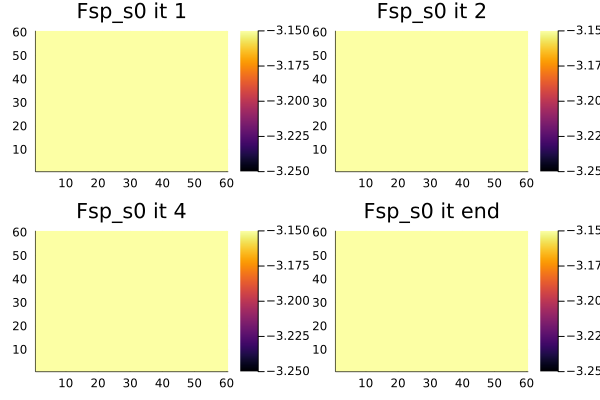

In [90]:
clim = (-3.25,-3.15)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s0 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s0 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[3]), title="Fsp_s0 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

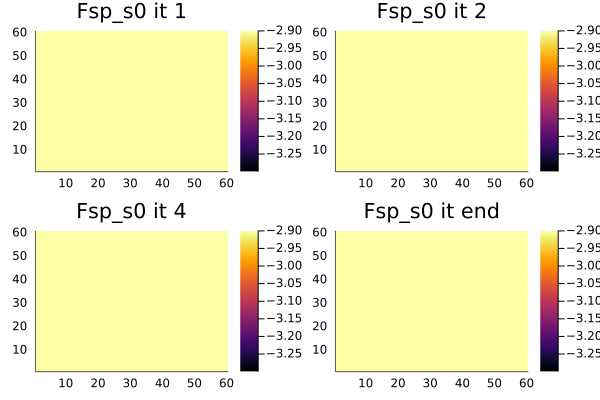

In [91]:
clim = (-3.3,-2.9)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s0 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s0 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[3]), title="Fsp_s0 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

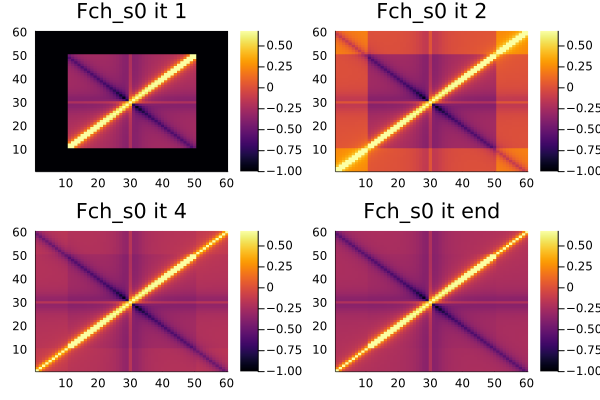

In [92]:
# χ_asympt only in corners
clim = (-1.0,0.68)
p1 = heatmap(real.(Fch_tr[1]) .- U, title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]) .- U, title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]) .- U, title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]) .- U, title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

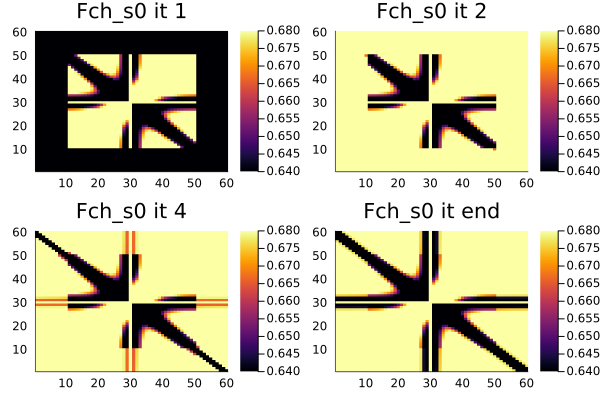

In [93]:
# everything treated equally in asympt
clim = (0.64,0.68)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [94]:
size(Fch_tr[end])
plot(real.(Fch_tr[end][171,:]))
pl_arr = zeros(size(Fch_tr[end],1))
for i in 10:length(pl_arr)
    pl_arr[i] = real(Fch_tr[end][i,end-i+10])
end
plot(real.(Fch_tr[end][101,:]))
#plot!(pl_arr)

LoadError: BoundsError: attempt to access 60×60 Matrix{ComplexF64} at index [171, 1:60]

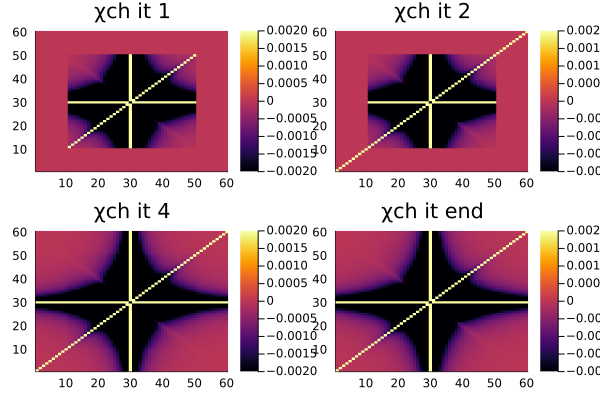

In [95]:
clim = (-0.002,0.002)
p1 = heatmap(real.(χch_tr[1]), title="χch it 1",clim=clim)
p2 = heatmap(real.(χch_tr[2]), title="χch it 2",clim=clim)
p3 = heatmap(real.(χch_tr[3]), title="χch it 4",clim=clim)
p4 = heatmap(real.(χch_tr[end]), title="χch it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

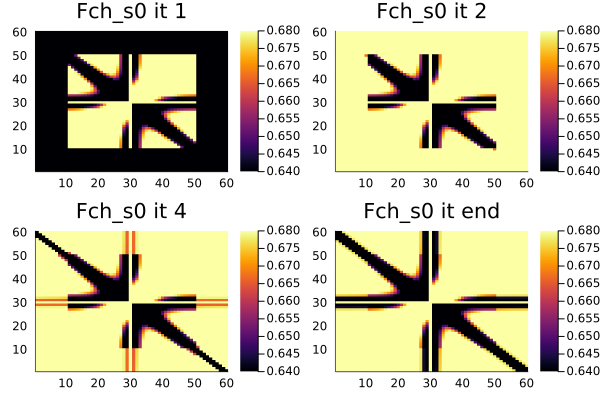

In [96]:
# everything treated equally in asympt
clim = (0.64,0.68)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

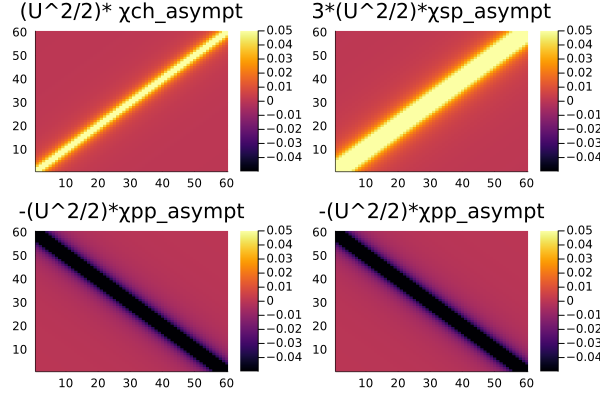

In [98]:
# everything treated equally in asympt
χch_a_pl = zeros(size(Fch_tr[1]))
χsp_a_pl = zeros(size(Fch_tr[1]))
χpp_a_pl = zeros(size(Fch_tr[1]))
I_all = union(helper.I_core, helper.I_asympt)
n_iω = trunc(Int,size(χsp,3)/2)
n_iν = trunc(Int,size(χsp,1)/2)
i1,i2 = aux_indices(I_all, ωi, n_iω, n_iν, helper.shift)
for i in 1:length(I_all)
    ii = I_all[i]
    χch_a_pl[ii] = (U^2/2)*real(helper.χch_asympt[i1[i]])
    χsp_a_pl[ii] = 3*(U^2/2)*real(helper.χsp_asympt[i1[i]])
    χpp_a_pl[ii] = -(U^2/2)*real(helper.χpp_asympt[i2[i]])
end
clim = (-0.05,0.05)
p1 = heatmap(χch_a_pl, title="(U^2/2)* χch_asympt",clim=clim)
p2 = heatmap(χsp_a_pl, title="3*(U^2/2)*χsp_asympt",clim=clim)
p3 = heatmap(χpp_a_pl, title="-(U^2/2)*χpp_asympt",clim=clim)
p4 = heatmap(χpp_a_pl, title="-(U^2/2)*χpp_asympt",clim=clim)
p = plot(p1,p2,p3,p3, layout=(2,2))

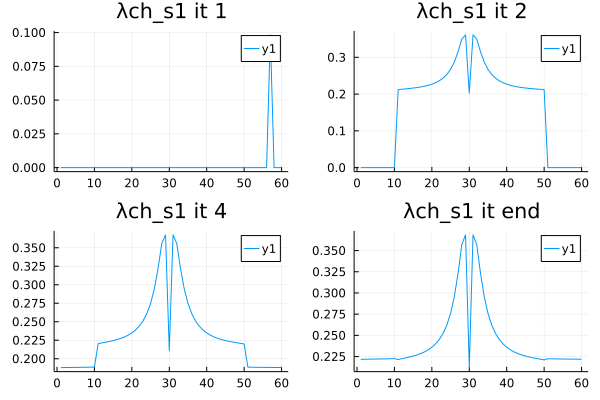

In [99]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λch_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λch_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[3]), title="λch_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λch_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

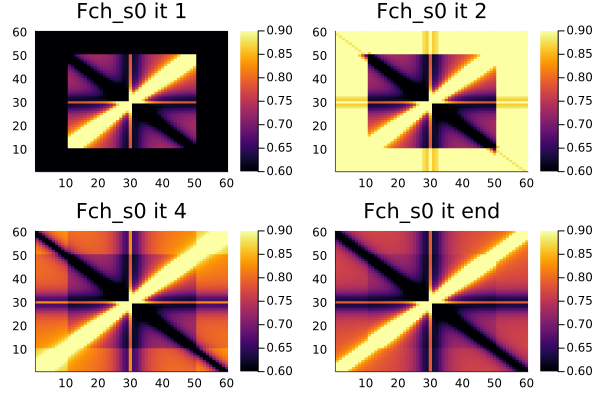

In [100]:
# \lambda only on sides
clim = (0.6,0.9)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

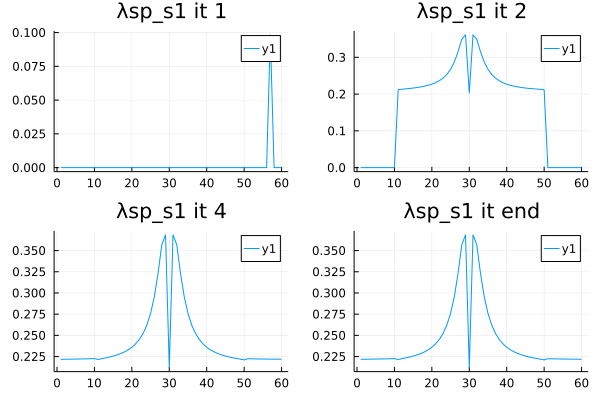

In [101]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [102]:
clim = (-0.01,0.01)
p11 = heatmap(real.(χDMFTch_impr_s0[:,:,21]), title="χch_s0 it 1",clim=clim)
p21 = heatmap(real.(χDMFTch_impr_s1[:,:,151]), title="χch_s1 it 1",clim=clim)
p31 = heatmap(real.(χDMFTch_impr_s0[:,:,21]), title="χch_s0 end",clim=clim)
p41 = heatmap(real.(χDMFTch_impr_s1[:,:,151]), title="χch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

LoadError: UndefVarError: χDMFTch_impr_s0 not defined

In [103]:
clim = (-0.1,0.1)
p11 = heatmap(real.(χDMFTsp_impr_s0[:,:,21]), title="χch_s0 it 1",clim=clim)
p21 = heatmap(real.(χDMFTsp_impr_s1[:,:,151]), title="χch_s1 it 1",clim=clim)
p31 = heatmap(real.(χDMFTsp_impr_s0[:,:,21]), title="χch_s0 end",clim=clim)
p41 = heatmap(real.(χDMFTsp_impr_s1[:,:,151]), title="χch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

LoadError: UndefVarError: χDMFTsp_impr_s0 not defined

In [104]:
imp_dens_s0 = 0.5*sum(real.(χDMFTsp_s0+χDMFTch_s0))/β_s0^3
imp_dens_impr_s0 = 0.5*sum(real.(χDMFTsp_impr_s0+χDMFTch_impr_s0))/β_s0^3
imp_dens_s1 = 0.5*sum(real.(χDMFTsp_s1+χDMFTch_s1))/β_s1^3
imp_dens_impr_s1 = 0.5*sum(real.(χDMFTsp_impr_s1+χDMFTch_impr_s1))/β_s1^3
imp_dens_as_s0 = 0.5*real(sum(helper_s0.χch_asympt .+ helper_s0.χsp_asympt))/β_s0
imp_dens_as_s1 = 0.5*real(sum(helper_s1.χch_asympt .+ helper_s1.χsp_asympt))/β_s1
Ssp_impr_s0 = real(sum(χDMFTsp_impr_s0[:,:,21]))/β_s0^2
Ssp_naive_s0 = real(sum( χDMFTsp_s0[:,:,21]))/β_s0^2
Ssp_true_s0 =  real(χ_sp_asympt_s0[1])
Sch_impr_s0 = real(sum(χDMFTch_impr_s0[:,:,21]))/β_s0^2
Sch_naive_s0 = real(sum( χDMFTch_s0[:,:,21]))/β_s0^2
Sch_true_s0 = real(χ_ch_asympt_s0[1])
Ssp_impr_s1 = real(sum( χDMFTsp_impr_s1[:,:,151]))/β_s1^2
Ssp_naive_s1 = real(sum( χDMFTsp_s1[:,:,151]))/β_s1^2
Ssp_true_s1 = real(χ_sp_asympt_s1[1])
Sch_impr_s1 = real(sum( χDMFTch_impr_s1[:,:,151]))/β_s1^2
Sch_naive_s1 = real(sum( χDMFTch_s1[:,:,151]))/β_s1^2
Sch_true_s1 = real(χ_ch_asympt_s1[1])
println("                     s0 naiive      s0 improved      s1 naiive      s1 improved")
println(" n/2 (1 - n/2)     $(round(imp_dens_s0,digits=8))      $(round(imp_dens_impr_s0,digits=8))      $(round(imp_dens_s1,digits=8))      $(round(imp_dens_impr_s1,digits=8))      ")
println(" n/2*(1 - n/2)(as) $(rpad(0.0,8))        $(round(imp_dens_as_s0,digits=8))      $(rpad(0.0,10))      $(round(imp_dens_as_s1,digits=8))      ")
println(" χsp(ω=0) true     $(rpad(0.0,8))        $(round(Ssp_true_s0,digits=8))      $(rpad(0.0,8))        $(round(Ssp_true_s1,digits=8))      ")
println(" χsp(ω=0)          $(round(Ssp_naive_s0,digits=8))      $(round(Ssp_impr_s0,digits=8))       $(round(Ssp_naive_s1,digits=8))      $(round(Ssp_impr_s1,digits=8))      ")
println(" χch(ω=0) true     $(rpad(0.0,8))        $(round(Sch_true_s0,digits=8))      $(rpad(0.0,8))        $(round(Sch_true_s1,digits=8))      ")
println(" χch(ω=0)          $(round(Sch_naive_s0,digits=8))       $(round(Sch_impr_s0,digits=8))      $(round(Sch_naive_s1,digits=8))      $(round(Sch_impr_s1,digits=8))      ")

LoadError: UndefVarError: χDMFTsp_s0 not defined

In [30]:

imp_dens_s0 = 0.5*sum(real.(χDMFTch_s0+χDMFTch_s0))/β_s0^3
imp_dens_impr_s0 = 0.5*sum(real.(χDMFTch_impr_s0+χDMFTch_impr_s0))/β_s0^3
imp_dens_s1 = 0.5*sum(real.(χDMFTch_s1+χDMFTch_s1))/β_s1^3
imp_dens_impr_s1 = 0.5*sum(real.(χDMFTch_impr_s1+χDMFTch_impr_s1))/β_s1^3
println("n/2 * (1 - n/2)     s0 naiive      s0 improved      s1 naiive      s1 improved")
println("                    $(round(imp_dens_s0,digits=8))      $(round(imp_dens_impr_s0,digits=8))      $(round(imp_dens_s1,digits=8))      $(round(imp_dens_impr_s1,digits=8))      ")

LoadError: UndefVarError: χDMFTch_s0 not defined

In [31]:
# Full 
                     s0 naiive      s0 improved      s1 naiive      s1 improved
 n/2 (1 - n/2)     0.10655486      0.19323526      0.14269089      0.16116186      
 n/2*(1 - n/2)(as) 0.0             0.17063648      0.0             0.17063648      
 χsp(ω=0) true     0.0             2.20818564      0.0             2.20818564      
 χsp(ω=0)          2.02099022      2.1307242       2.18264899      2.18688092      
 χch(ω=0) true     0.0             0.34813023      0.0             0.34813023      
 χch(ω=0)          0.3366906       0.34346704      0.34667931      0.3469208 

 # no λ edges



LoadError: syntax: extra token "naiive" after end of expression

# Comparisons

In [1]:
test_06 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b06u1.jld2"
testc_06 = "/home/julian/Hamburg/ED_data/asympt_tests/config_06.toml"
test_10 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b10u1.jld2"
testc_10 = "/home/julian/Hamburg/ED_data/asympt_tests/config_10.toml"
test_14 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1.jld2"
testc_14 = "/home/julian/Hamburg/ED_data/asympt_tests/config_14.toml"
test_18 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b18u1.jld2"
testc_18 = "/home/julian/Hamburg/ED_data/asympt_tests/config_18.toml"

using Plots
using OffsetArrays
using JLD2
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../src/dbg_tools.jl")

using Printf
using Query
using SeriesAcceleration
using TOML

using TimerOutputs
using Pkg
Pkg.activate("/home/julian/Hamburg/Julia_lDGA/LadderDGA.jl")
using LadderDGA

sum_freq_full_f! = LadderDGA.sum_freq_full_f!
_eltype = ComplexF64

  Activating project at `~/Hamburg/Julia_lDGA/LadderDGA.jl`
┌ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b]
└ @ Base loading.jl:1423


ComplexF64 (alias for Complex{Float64})

In [5]:
f = test_14
cf = testc_14
mP, sP, env, kGridsStr = readConfig(cf);
Nν_shell = sP.χ_helper.Nν_shell
rsum(x) = sum_freq_full_f!(x, mP.β, sP)*(mP.β^ndims(x))

gImp, χ₀, χsp, χch, helper, U, β = setup(f, Nν_shell);

χsp_impr = deepcopy(χsp)
χch_impr = deepcopy(χch)
χsp_impr_r = deepcopy(χsp)
χch_impr_r = deepcopy(χch)
χsp = real.(χsp)
χch = real.(χch)
mP, sP, env, kGrids = readConfig(cf);
χsp_ω_naiive = sum(χsp, dims=[1,2])[1,1,:]/β^2;
χch_ω_naiive = sum(χch, dims=[1,2])[1,1,:]/β^2;
χsp_ω_rOnly = mapslices(x->sum_freq_full_f!(x, mP.β, sP), χsp, dims=[1,2])[1,1,:];
χch_ω_rOnly = mapslices(x->sum_freq_full_f!(x, mP.β, sP), χch, dims=[1,2])[1,1,:];
for ωi in 1:size(χsp_impr,3)
    improve_χ!(:sp, ωi, view(χsp_impr,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=100, atol=1e-12);
    improve_χ!(:ch, ωi, view(χch_impr,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=100, atol=1e-12);
    #improve_χ!(:sp, ωi, view(χsp_impr_r,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=100, atol=1e-12, sumf=rsum);
    #improve_χ!(:ch, ωi, view(χch_impr_r,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=100, atol=1e-12, sumf=rsum);
end
χsp_ω_aOnly = real.(sum(χsp_impr, dims=[1,2])[1,1,:])/β^2;
χch_ω_aOnly = real.(sum(χch_impr, dims=[1,2])[1,1,:])/β^2;
χsp_ω_aPartR = mapslices(x->sum_freq_full_f!(x, mP.β, sP), real.(χsp_impr), dims=[1,2])[1,1,:];
χch_ω_aPartR = mapslices(x->sum_freq_full_f!(x, mP.β, sP), real.(χch_impr), dims=[1,2])[1,1,:];
#χsp_ω_aFullR = mapslices(x->sum_freq_full_f!(x, mP.β, sP), real.(χsp_impr_r), dims=[1,2])[1,1,:];
#χch_ω_aFullR = mapslices(x->sum_freq_full_f!(x, mP.β, sP), real.(χch_impr_r), dims=[1,2])[1,1,:];

[ Info: Reading Inputs...
[ Warning: Found Hubbard Parameters in input .jld2, ignoring config.toml
[ Warning: Frequency file not found, reconstructing grid from config.
[ Info: Reading Inputs...
[ Warning: Found Hubbard Parameters in input .jld2, ignoring config.toml
[ Warning: Frequency file not found, reconstructing grid from config.


In [ ]:
xr = 101:110
plot(0:9, real.(helper.χsp_asympt)[1:10], markersize=10, alpha=0.6, markershape=:auto, label="asympt")
#plot!(xr .- 101, χsp_ω_naiive[xr],markersize=8, alpha=0.6, markershape=:auto, label="naiive")
#plot!(xr .- 101,χsp_ω_rOnly[xr],markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
plot!(xr .- 101,χsp_ω_aOnly[xr],markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
#plot!(xr .- 101,χsp_ω_aPartR[xr], markershape=:auto, label="Asympt + Richardson ω")
#plot!(xr .- 101,χsp_ω_aFullR[xr], markershape=:auto, label="Asympt + Richardson")

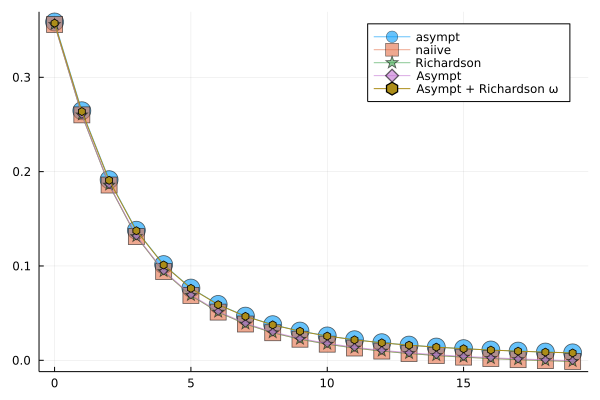

In [9]:
xr = 101:120
rt = real.(helper.χch_asympt)[1:20]
#rt[1] += 2*((1/2)*(1-1/2))/β
#plot(0:19, rt, markersize=10, alpha=0.6, markershape=:auto, label="asympt")
#plot!(xr .- 101, χch_ω_naiive[xr],markersize=8, alpha=0.6, markershape=:auto, label="naiive")
plot!(xr .- 101,χch_ω_rOnly[xr],markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
plot!(xr .- 101,χch_ω_aOnly[xr],markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
plot!(xr .- 101,χch_ω_aPartR[xr], markershape=:auto, label="Asympt + Richardson ω")
#plot!(xr .- 101,χsp_ω_aFullR[xr], markershape=:auto, label="Asympt + Richardson")

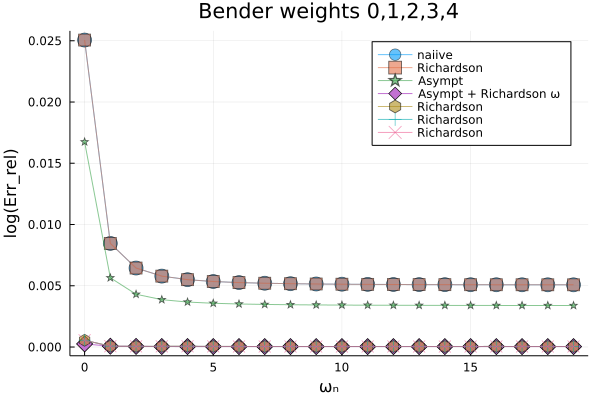

In [19]:
xr = 101:120
err_rel_naiive = abs.(χsp_ω_naiive[xr] .- real.(helper.χsp_asympt)[1:20]) 
err_rel_rOnly = abs.(χsp_ω_rOnly[xr] .- real.(helper.χsp_asympt)[1:20]) 
err_rel_aOnly = abs.(χsp_ω_aOnly[xr] .- real.(helper.χsp_asympt)[1:20])
err_rel_aPartR = abs.(χsp_ω_aPartR[xr] .- real.(helper.χsp_asympt)[1:20])
#plot(xr .- 101, (err_rel_naiive), title="Bender weights 0,1,2,3,4", ylabel="log(Err_rel)", xlabel="ωₙ", legend=:topright,markersize=8, alpha=0.6, markershape=:auto, label="naiive")
plot!(xr .- 101, (err_rel_rOnly), markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
#plot!(xr .- 101, (err_rel_aOnly), markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
#plot!(xr .- 101, (err_rel_aPartR), markershape=:auto, markersize=8, label="Asympt + Richardson ω")
#plot(abs.(χsp_ω_aFullR[xr] .- real.(helper.χsp_asympt)[1:10]), markershape=:auto, label="Asympt + Richardson")

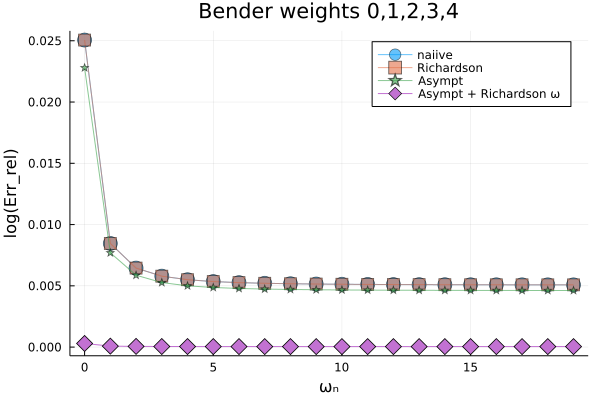

In [21]:
xr = 101:120
err_rel_naiive = abs.(χsp_ω_naiive[xr] .- real.(helper.χsp_asympt)[1:20]) 
err_rel_rOnly = abs.(χsp_ω_rOnly[xr] .- real.(helper.χsp_asympt)[1:20]) 
err_rel_aOnly = abs.(χsp_ω_aOnly[xr] .- real.(helper.χsp_asympt)[1:20])
err_rel_aPartR = abs.(χsp_ω_aPartR[xr] .- real.(helper.χsp_asympt)[1:20])
plot(xr .- 101, (err_rel_naiive), title="Bender weights 0,1,2,3,4", ylabel="log(Err_rel)", xlabel="ωₙ", legend=:topright,markersize=8, alpha=0.6, markershape=:auto, label="naiive")
plot!(xr .- 101, (err_rel_rOnly), markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
plot!(xr .- 101, (err_rel_aOnly), markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
plot!(xr .- 101, (err_rel_aPartR), markershape=:auto, markersize=8, label="Asympt + Richardson ω")
#plot(abs.(χsp_ω_aFullR[xr] .- real.(helper.χsp_asympt)[1:10]), markershape=:auto, label="Asympt + Richardson")

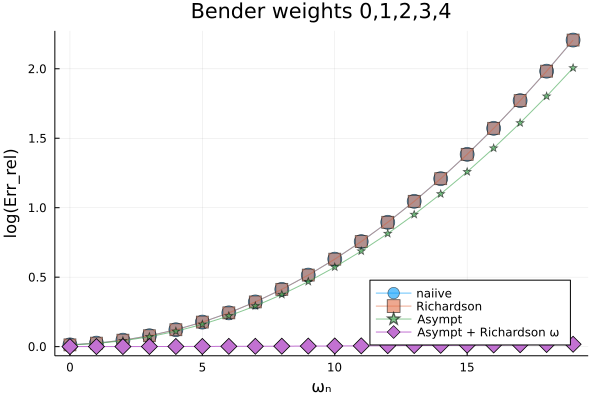

In [19]:
xr = 101:120
err_rel_naiive = abs.(χsp_ω_naiive[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_rOnly = abs.(χsp_ω_rOnly[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_aOnly = abs.(χsp_ω_aOnly[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_aPartR = abs.(χsp_ω_aPartR[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
plot(xr .- 101, (err_rel_naiive), title="Bender weights 0,1,2,3,4", ylabel="log(Err_rel)", xlabel="ωₙ", legend=:bottomright,markersize=8, alpha=0.6, markershape=:auto, label="naiive")
plot!(xr .- 101, (err_rel_rOnly), markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
plot!(xr .- 101, (err_rel_aOnly), markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
plot!(xr .- 101, (err_rel_aPartR), markershape=:auto, markersize=8, label="Asympt + Richardson ω")
#plot(abs.(χsp_ω_aFullR[xr] .- real.(helper.χsp_asympt)[1:10]), markershape=:auto, label="Asympt + Richardson")

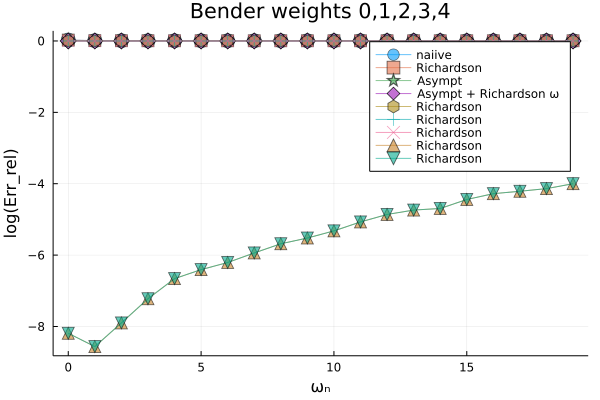

In [21]:
#N_shell = 40
xr = 101:120
err_rel_naiive = abs.(χsp_ω_naiive[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_rOnly = abs.(χsp_ω_rOnly[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_aOnly = abs.(χsp_ω_aOnly[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_aPartR = abs.(χsp_ω_aPartR[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
plot(xr .- 101, log.(err_rel_naiive), title="Rohringer weights 0,2,4", ylabel="log(Err_rel)", xlabel="ωₙ", legend=:bottomright,markersize=8, alpha=0.6, markershape=:auto, label="naiive")
plot!(xr .- 101, log.(err_rel_rOnly), markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
plot!(xr .- 101, log.(err_rel_aOnly), markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
plot!(xr .- 101, log.(err_rel_aPartR), markershape=:auto, markersize=8, label="Asympt + Richardson ω")
plot(abs.(χsp_ω_aFullR[xr] .- real.(helper.χsp_asympt)[1:10]), markershape=:auto, label="Asympt + Richardson")

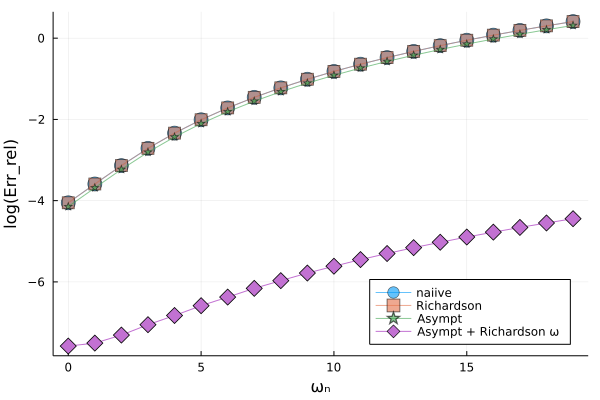

In [112]:
#N_shell = 10
xr = 101:120
err_rel_naiive = abs.(χsp_ω_naiive[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_rOnly = abs.(χsp_ω_rOnly[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_aOnly = abs.(χsp_ω_aOnly[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
err_rel_aPartR = abs.(χsp_ω_aPartR[xr] .- real.(helper.χsp_asympt)[1:20]) ./ abs.(helper.χsp_asympt)[1:20]
plot(xr .- 101, log.(err_rel_naiive), ylabel="log(Err_rel)", xlabel="ωₙ", legend=:bottomright,markersize=8, alpha=0.6, markershape=:auto, label="naiive")
plot!(xr .- 101, log.(err_rel_rOnly), markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
plot!(xr .- 101, log.(err_rel_aOnly), markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
plot!(xr .- 101, log.(err_rel_aPartR), markershape=:auto, markersize=8, label="Asympt + Richardson ω")
#plot(abs.(χsp_ω_aFullR[xr] .- real.(helper.χsp_asympt)[1:10]), markershape=:auto, label="Asympt + Richardson")

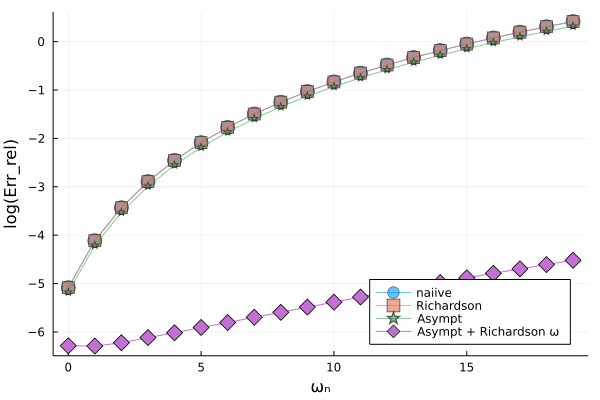

In [113]:
xr = 101:120
err_rel_naiive = abs.(χch_ω_naiive[xr] .- real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20]
err_rel_rOnly = abs.(χch_ω_rOnly[xr] .- real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20]
err_rel_aOnly = abs.(χch_ω_aOnly[xr] .- real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20]
err_rel_aPartR = abs.(χch_ω_aPartR[xr] .- real.(helper.χch_asympt)[1:20]) ./ abs.(helper.χch_asympt)[1:20]
plot(xr .- 101, log.(err_rel_naiive), ylabel="log(Err_rel)", xlabel="ωₙ", legend=:bottomright,markersize=8, alpha=0.6, markershape=:auto, label="naiive")
plot!(xr .- 101, log.(err_rel_rOnly), markersize=6, alpha=0.6, markershape=:auto, label="Richardson")
plot!(xr .- 101, log.(err_rel_aOnly), markersize=4, alpha=0.6, markershape=:auto, label="Asympt")
plot!(xr .- 101, log.(err_rel_aPartR), markershape=:auto, markersize=8, label="Asympt + Richardson ω")
#plot(abs.(χsp_ω_aFullR[xr] .- real.(helper.χsp_asympt)[1:10]), markershape=:auto, label="Asympt + Richardson")

In [115]:
using DataFrames
find_usable_interval = LadderDGA.find_usable_interval

iωn = 1im .* 2 .* (-sP.n_iω:sP.n_iω) .* π ./ mP.β
χsp_a = zeros(length(-sP.n_iω:sP.n_iω))
χch_a = zeros(length(-sP.n_iω:sP.n_iω))
χsp_a[1:sP.n_iω+1] = real.(reverse(helper.χsp_asympt[1:sP.n_iω+1]))
χsp_a[sP.n_iω+2:end] = real.(helper.χsp_asympt[2:sP.n_iω+1])
χch_a[1:sP.n_iω+1] = real.(reverse(helper.χch_asympt[1:sP.n_iω+1]))
χch_a[sP.n_iω+2:end] = real.(helper.χch_asympt[2:sP.n_iω+1])

usable_asympt = intersect(find_usable_interval(real(χsp_a),reduce_range_prct=0.0),find_usable_interval(real(χch_a),reduce_range_prct=0.0))
usable_naiive = intersect(find_usable_interval(real(χsp_ω_naiive),reduce_range_prct=0.1),find_usable_interval(real(χch_ω_naiive),reduce_range_prct=0.1))
usable_rOnly = intersect(find_usable_interval(real(χsp_ω_rOnly),reduce_range_prct=0.1),find_usable_interval(real(χch_ω_rOnly),reduce_range_prct=0.1))
usable_aOnly = intersect(find_usable_interval(real(χsp_ω_aOnly),reduce_range_prct=0.1),find_usable_interval(real(χch_ω_aOnly),reduce_range_prct=0.1))
usable_aPartR = intersect(find_usable_interval(real(χsp_ω_aPartR),reduce_range_prct=0.1),find_usable_interval(real(χch_ω_aPartR),reduce_range_prct=0.1))


χupup_asympt_ω = (χsp_a .+ χch_a)/2
χupup_asympt_ω_sub = subtract_tail(χupup_asympt_ω, mP.Ekin_DMFT, iωn)
χupup_naiive_ω = (χsp_ω_naiive .+ χch_ω_naiive)/2
χupup_naiive_ω_sub = subtract_tail(χupup_naiive_ω, mP.Ekin_DMFT, iωn)
χupup_rOnly_ω = (χsp_ω_rOnly .+ χch_ω_rOnly)/2
χupup_rOnly_ω_sub = subtract_tail(χupup_rOnly_ω, mP.Ekin_DMFT, iωn)
χupup_aOnly_ω = (χsp_ω_aOnly .+ χch_ω_aOnly)/2
χupup_aOnly_ω_sub = subtract_tail(χupup_aOnly_ω, mP.Ekin_DMFT, iωn)
χupup_aPartR_ω = (χsp_ω_aPartR .+ χch_ω_aPartR)/2
χupup_aPartR_ω_sub = subtract_tail(χupup_aPartR_ω, mP.Ekin_DMFT, iωn)

test_asympt_naiive = sum(χupup_asympt_ω)/(β)
test_asympt_coeff = sum(χupup_asympt_ω_sub)/(β) -mP.Ekin_DMFT*mP.β/12
test_asympt_coeffU = sum(χupup_asympt_ω_sub[usable_asympt])/(β) -mP.Ekin_DMFT*mP.β/12
test_naiive_naiive = sum(χupup_naiive_ω)/(β)
test_naiive_coeff = sum(χupup_naiive_ω_sub)/(β) -mP.Ekin_DMFT*mP.β/12
test_naiive_coeffU = sum(χupup_naiive_ω_sub[usable_naiive])/(β) -mP.Ekin_DMFT*mP.β/12
test_rOnly_naiive = sum(χupup_rOnly_ω)/(β)
test_rOnly_coeff = sum(χupup_rOnly_ω_sub)/(β) -mP.Ekin_DMFT*mP.β/12
test_rOnly_coeffU = sum(χupup_rOnly_ω_sub[usable_rOnly])/(β) -mP.Ekin_DMFT*mP.β/12
test_aOnly_naiive = sum(χupup_aOnly_ω)/(β)
test_aOnly_coeff = sum(χupup_aOnly_ω_sub)/(β) -mP.Ekin_DMFT*mP.β/12
test_aOnly_coeffU = sum(χupup_aOnly_ω_sub[usable_aOnly])/(β) -mP.Ekin_DMFT*mP.β/12
test_aPartR_naiive = sum(χupup_aPartR_ω)/(β)
test_aPartR_coeff = sum(χupup_aPartR_ω_sub)/(β) -mP.Ekin_DMFT*mP.β/12
test_aPartR_coeffU = sum(χupup_aPartR_ω_sub[usable_aPartR])/(β) -mP.Ekin_DMFT*mP.β/12

df = DataFrame(
    "usable range" => [usable_asympt,usable_naiive,usable_rOnly,usable_aOnly,usable_aPartR],
    "n/2 * (1-n/2)" => [test_asympt_naiive,test_naiive_naiive,test_rOnly_naiive,test_aOnly_naiive,test_aPartR_naiive],
    "coeff n/2 * (1-n/2)" => [test_asympt_coeff,test_naiive_coeff,test_rOnly_coeff,test_aOnly_coeff,test_aPartR_coeff],
    "coeff+URange n/2 * (1-n/2)" => [test_asympt_coeffU,test_naiive_coeffU,test_rOnly_coeffU,test_aOnly_coeffU,test_aPartR_coeffU]
)

5×4 DataFrame
 Row │ usable range  n/2 * (1-n/2)  coeff n/2 * (1-n/2)  coeff+URange n/2 * (1 ⋯
     │ UnitRange…    Float64        Float64              Float64               ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 1:201              0.247467             0.249932                    0.2 ⋯
   2 │ 86:116             0.141156             0.143621                    0.2
   3 │ 86:116             0.141156             0.143621                    0.2
   4 │ 85:117             0.151355             0.153821                    0.2
   5 │ 11:191             0.246369             0.248834                    0.2 ⋯
                                                                1 column omitted

# Non Local Tests

In [9]:
test_06 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b06u1.jld2"
testc_06 = "/home/julian/Hamburg/ED_data/asympt_tests/config_06.toml"
test_10 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b10u1.jld2"
testc_10 = "/home/julian/Hamburg/ED_data/asympt_tests/config_10.toml"
test_14 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1.jld2"
testc_14 = "/home/julian/Hamburg/ED_data/asympt_tests/config_14.toml"
test_18 = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b18u1.jld2"
testc_18 = "/home/julian/Hamburg/ED_data/asympt_tests/config_18.toml"

"/home/julian/Hamburg/ED_data/asympt_tests/config_18.toml"

In [93]:
using TimerOutputs
using Pkg
Pkg.activate("/home/julian/Hamburg/Julia_lDGA/LadderDGA.jl")
using LadderDGA
using Plots
cf = "/home/julian/Hamburg/ED_data/asympt_tests/config_14_small.toml"
mP, sP, env, kGridsStr = readConfig(cf);
Σ_ladderLoc, Σ_loc, imp_density, kG, gLoc_fft, Γsp, Γch, FUpDo = setup_LDGA(kGridsStr[1], mP, sP, env)
bubble = calc_bubble(gLoc_fft, kG, mP, sP);
nlQ_sp = calc_χ_γ(:sp, Γsp, bubble, kG, mP, sP);
nlQ_ch = calc_χ_γ(:ch, Γch, bubble, kG, mP, sP);

[ Info: Reading Inputs...
[ Warning: Found Hubbard Parameters in input .jld2, ignoring config.toml
[ Warning: Frequency file not found, reconstructing grid from config.
[ Info: Setting up calculation for kGrid 3Dsc-0.2041241452319315 of size 4
[ Warning: Selfenergie now contains Hartree term and is cut to νmax = length(usable_ω)/3!
[ Info: setting usable ranges of sp and ch channel from 41:61 and 41:61 to the same range of 41:61
[ Warning: TODO: update local omega sum with correction, update get_sum_helper to return tail sub
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(41:61) = 0.319, χLoc_ch(41:61) = 0.1339
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.20381586335502844 ?=? 0.22642431486383066 ?≈? 0.22642431486383066 ?≈? 0.25"


  Activating project at `~/Hamburg/Julia_lDGA/LadderDGA.jl`


In [94]:
cf_10 = "/home/julian/Hamburg/ED_data/asympt_tests/config_14_2_small.toml"
mP_10, sP_10, env_10, kGridsStr_10 = readConfig(cf_10);
Σ_ladderLoc_10, Σ_loc_10, imp_density_10, kG_10, gLoc_fft_10, Γsp_10, Γch_10, FUpDo_10 = setup_LDGA(kGridsStr_10[1], mP_10, sP_10, env_10)
bubble_10 = calc_bubble(gLoc_fft_10, kG_10, mP_10, sP_10);
nlQ_sp_10 = calc_χ_γ(:sp, Γsp_10, bubble_10, kG_10, mP_10, sP_10);
nlQ_ch_10 = calc_χ_γ(:ch, Γch_10, bubble_10, kG_10, mP_10, sP_10);

[ Info: Reading Inputs...
[ Warning: Found Hubbard Parameters in input .jld2, ignoring config.toml
[ Warning: Frequency file not found, reconstructing grid from config.
[ Info: Setting up calculation for kGrid 3Dsc-0.2041241452319315 of size 4
[ Warning: Selfenergie now contains Hartree term and is cut to νmax = length(usable_ω)/3!
[ Info: Using asymptotics improvement for large ν, ν' of χ_DMFT with shell size of 10
[ Info: setting usable ranges of sp and ch channel from 40:62 and 40:62 to the same range of 40:62
[ Warning: TODO: update local omega sum with correction, update get_sum_helper to return tail sub
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(40:62) = 0.3221, χLoc_ch(40:62) = 0.1351
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.20796962149810255 ?=? 0.22861470323600924 ?≈? 0.22861470323600924 ?≈? 0.25"


LsqFit.LsqFitResult{Vector{Float64}, Vector{ComplexF64}, Matrix{ComplexF64}, Vector{Float64}}([4.315426764111823, 701.2287174536885], ComplexF64[0.005655556565010979 + 0.0im, 0.0025575205197994385 + 0.0im, 0.0004184393363599035 + 0.0im, -0.0010415595031304289 + 0.0im, -0.0020158923705668303 + 0.0im, -0.0026414639412636032 + 0.0im, -0.0030147629380687054 + 0.0im, -0.0032060016599162098 + 0.0im, -0.003265154276393482 + 0.0im, -0.0032296052260965278 + 0.0im  …  0.004049022602406983 + 0.0im, 0.004088281398189553 + 0.0im, 0.004127250405380484 + 0.0im, 0.00416514813524731 + 0.0im, 0.004202839219534028 + 0.0im, 0.004239519459304716 + 0.0im, 0.004276071129977867 + 0.0im, 0.0043116664897188215 + 0.0im, 0.004347206996548312 + 0.0im, 0.004381840410404271 + 0.0im], ComplexF64[-0.00701670246828789 + 0.0im 4.923411352884975e-5 + 0.0im; -0.006332573977650566 + 0.0im 4.010149318282648e-5 + 0.0im; … ; -0.00025844603520727304 + 0.0im 6.679435309314801e-8 + 0.0im; -0.000253302959112661 + 0.0im 6.41623890

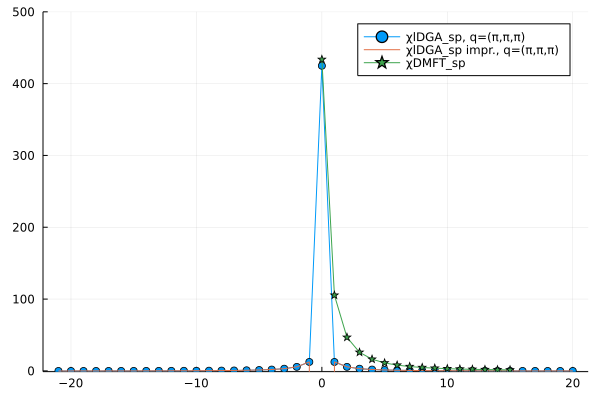

In [92]:
using Plots
using JLD2
f = jldopen("/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1_small.jld2","r")
χsp_asympt = real.(f["χ_sp_asympt"])
close(f)
xr = 30:71
#80:120
plot(xr .- 51,real.(nlQ_sp.χ[10,xr]),ylims=(-1,500), markershape=:auto, label="χlDGA_sp, q=(π,π,π)")
plot!(xr .- 51,real.(nlQ_sp_10.χ[10,xr]), label="χlDGA_sp impr., q=(π,π,π)")
plot!(0:15, χsp_asympt[1:16], markershape=:auto, label="χDMFT_sp")

32769-element Vector{ComplexF64}:
 433.73242292329996 + 0.0im
     105.4019997199 - 0.0im
      46.7827870583 + 0.0im
      25.8700226612 - 0.0im
      16.2632263415 + 0.0im
      11.1045564773 + 0.0im
       8.0334330867 + 0.0im
       6.0658690618 - 0.0im
 4.7338959013999995 + 0.0im
        3.792545949 + 0.0im
       3.1038521595 + 0.0im
       2.5854798444 + 0.0im
 2.1859240157000004 + 0.0im
                    ⋮
           3.038e-7 + 0.0im
           3.037e-7 + 0.0im
           3.037e-7 + 0.0im
           3.037e-7 + 0.0im
           3.037e-7 + 0.0im
           3.037e-7 + 0.0im
           3.037e-7 - 0.0im
           3.036e-7 + 0.0im
           3.036e-7 + 0.0im
           3.036e-7 + 0.0im
           3.036e-7 + 0.0im
           3.036e-7 + 0.0im

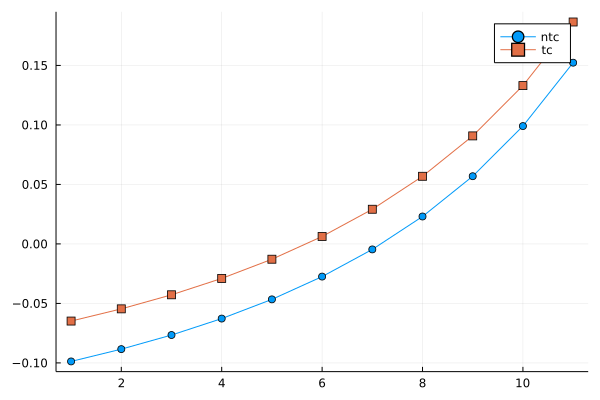

In [73]:
xr = 30:40
plot(real.(nlQ_sp.χ[10,xr]), markershape=:auto, label="ntc")
plot!(real.(nlQ_sp_10.χ[10,xr]), markershape=:auto,label="tc")

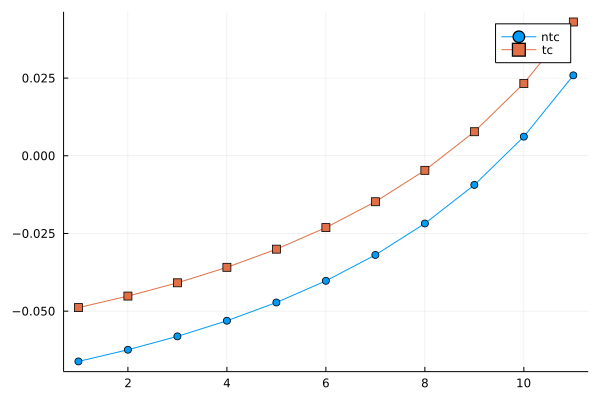

In [49]:
xr = 30:40
plot(real.(nlQ_sp.χ[10,xr]), markershape=:auto, label="ntc")
plot!(real.(nlQ_sp_10.χ[10,xr]), markershape=:auto,label="tc")

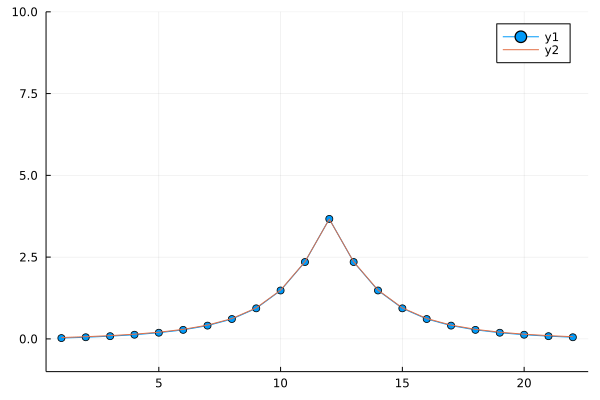

In [42]:
xr = 40:61
plot(real.(nlQ_ch.χ[10,xr]),ylims=(-1,10), markershape=:auto)
plot!(real.(nlQ_ch_10.χ[10,xr]))

In [36]:
nlQ_sp_10.usable_ω

42:60

In [66]:
nlQ_sp.usable_ω

42:60

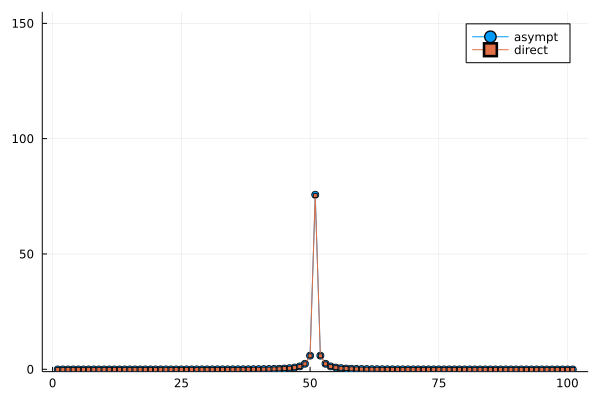

In [65]:
using Plots
plot(real.(nlQ_sp_10.χ[10,:]),ylims=(-1,155),markershape=:auto,label="asympt")
plot!(real.(nlQ_sp.χ[10,:]),markershape=:auto, markersize=2,label="direct")

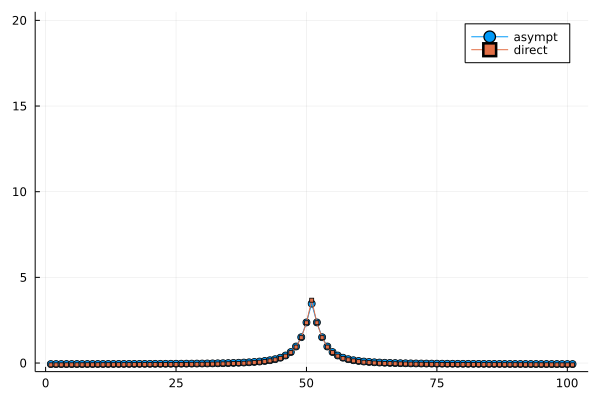

In [61]:
plot(real.(nlQ_ch_10.χ[10,:]),ylims=(-0.5,20.5),markershape=:auto,label="asympt")
plot!(real.(nlQ_ch.χ[10,:]),markershape=:auto, markersize=2,label="direct")

In [62]:
ωi = 102
qi = 1
tmp    = deepcopy(Γch[:,:,ωi])
tmp_10 = deepcopy(Γch_10[:,:,ωi])

for l in 1:size(tmp,1)
    tmp[l,l] = Γch[l,l,ωi]#+ 1.0/bubble[qi,l,ωi]
end
for l in 1:size(tmp_10,1)
    tmp_10[l,l] = Γch_10[l,l,ωi]# + 1.0/bubble_10[qi,l,ωi]
end
#tmp_inv = inv(tmp);
#tmp_inv_10 = inv(tmp_10);

LoadError: BoundsError: attempt to access 100×100×101 Array{ComplexF64, 3} at index [1:100, 1:100, 102]

In [4]:
ωi = 101
qi_2 = 9
tmp_2_10 = deepcopy(Γsp_10[:,:,ωi])
for l in 1:size(tmp_2_10,1)
    tmp_2_10[l,l] = Γsp_10[l,l,ωi] + 1.0/bubble_10[qi_2,l,ωi]
end
tmp_inv_2_10 = inv(tmp_2_10);

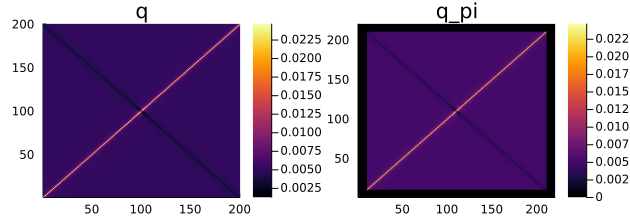

In [25]:
p1 = heatmap(real.(tmp), title="q")
p2 = heatmap(real.(tmp_10), title="q_pi")
plot(p1,p2, size=(630,220))

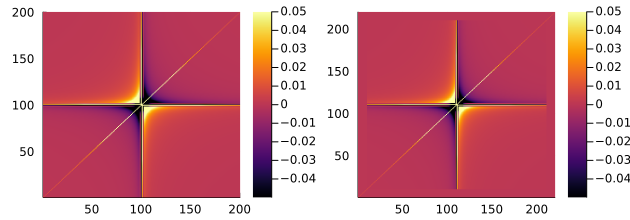

In [8]:
using Plots
p1 = heatmap(real.(tmp_inv),clims=(-0.05,0.05))
p2 = heatmap(real.(tmp_inv_10),clims=(-0.05,0.05))
plot(p1,p2, size=(630,220))

In [29]:
#include("/home/julian/Hamburg/BSE_SC.jl/src/dbg_tools.jl")
i2, Fr_trace2, χr_trace2, χlocr_trace2, λr_trace2 = LadderDGA.BSE_SC.improve_χ_trace!(:ch, ωi, tmp_inv_2_10, view(bubble_10,qi_2,:,ωi), mP_10.U, mP_10.β, sP_10.χ_helper, Nit=10);
i, Fr_trace, χr_trace, χlocr_trace, λr_trace      = LadderDGA.BSE_SC.improve_χ_trace!(:ch, ωi, tmp_inv_10,   view(bubble_10,qi,:,ωi),   mP_10.U, mP_10.β, sP_10.χ_helper, Nit=10);

#i2 = LadderDGA.improve_χ!(:sp, ωi, tmp_inv_2_10, view(bubble_10,qi_2,:,ωi), mP_10.U, mP_10.β, sP_10.χ_helper, Nit=200);
#i  = LadderDGA.improve_χ!(:sp, ωi, tmp_inv_10,   view(bubble_10,qi,:,ωi),   mP_10.U, mP_10.β, sP_10.χ_helper, Nit=200);


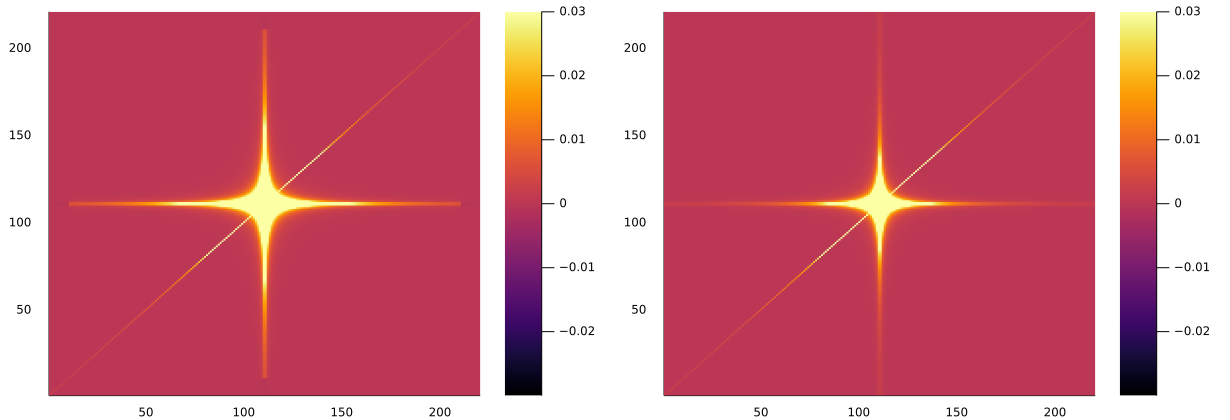

In [33]:
p1 = heatmap(real.(tmp_inv_10),clims=(-0.03,0.03))
p2 = heatmap(real.(tmp_inv_2_10),clims=(-0.03,0.03))

plot(p1,p2, size=(1230,420))

In [391]:
LadderDGA.improve_χ!(:sp, ωi, tmp_inv, view(bubble,qi,:,ωi), mP.U, mP.β, sP.χ_helper);
LadderDGA.improve_χ!(:sp, ωi, tmp_inv_10, view(bubble_10,qi,:,ωi), mP_10.U, mP_10.β, sP_10.χ_helper, Nit=25);

In [ ]:
LadderDGA.BSE_SC.improve_χ!(:sp, ωi, tmp_inv, view(bubble,qi,:,ωi), mP.U, mP.β, sP.χ_helper);
LadderDGA.BSE_SC.improve_χ!(:sp, ωi, tmp_inv_10, view(bubble_10,qi,:,ωi), mP_10.U, mP_10.β, sP_10.χ_helper, Nit=25);

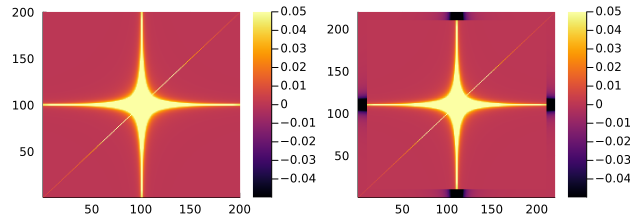

In [392]:
p1 = heatmap(real.(tmp_inv),clims=(-0.05,0.05))
p2 = heatmap(real.(tmp_inv_10),clims=(-0.05,0.05))
plot(p1,p2, size=(630,220))

In [8]:
λsp_old = λ_correction(:sp, imp_density, FUpDo, Σ_loc, Σ_ladderLoc, nlQ_sp, nlQ_ch,bubble, gLoc_fft, kG, mP, sP)

[ Warning: currently using min(usable_sp, usable_ch) = min(98:104,98:104) = 98:104 for all calculations. relax this?
[ Info:  using n/2 * (1 - n/2) - Σ χch as rhs
┌ Info: Found usable intervals for non-local susceptibility of length 
│ sp: 98:104, length: 7
│ ch: 98:104, length: 7
│ usable: 98:104, length: 7
└ χch sum = 679.9163500214935, rhs = -679.4163500214935
┌ Info: Found λsp 
└   λsp = NaN


NaN

In [9]:
λsp_old = λ_correction(:sp_ch, imp_density, FUpDo, Σ_loc, Σ_ladderLoc, nlQ_sp, nlQ_ch,bubble, gLoc_fft, kG, mP, sP)

LoadError: InterruptException:

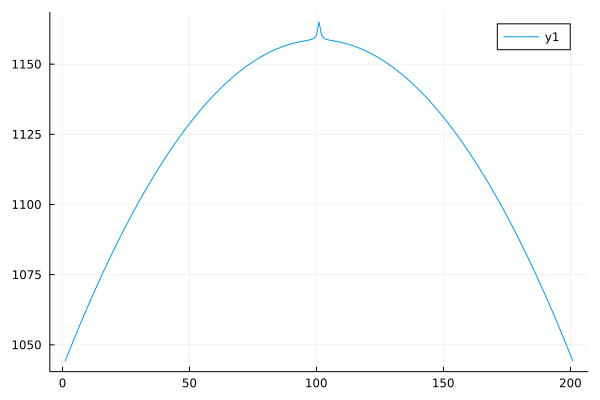

In [11]:
plot(real.(nlQ_sp.χ[1,:]))

In [49]:
λnew = λ_correction(:sp_ch, imp_density, FUpDo, Σ_loc, Σ_ladderLoc, nlQ_sp, nlQ_ch,bubble, gLoc_fft, kG, mP, sP)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 0.1]
 * Zero: [-1.6296916731027689, -4.0310833319315265]
 * Inf-norm of residuals: 0.000000
 * Iterations: 15
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 15
 * Jacobian Calls (df/dx): 12

In [52]:
λnew = λ_correction(:sp_ch, imp_density, FUpDo, Σ_loc, Σ_ladderLoc, nlQ_sp, nlQ_ch,bubble, gLoc_fft, kG, mP, sP)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 0.1]
 * Zero: [1.89199047752575, 1.084181561710906e12]
 * Inf-norm of residuals: 3.544864
 * Iterations: 1000
 * Convergence: false
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: false
 * Function Calls (f): 18
 * Jacobian Calls (df/dx): 17

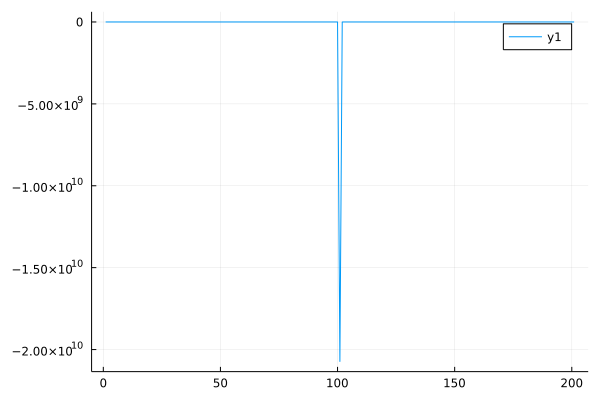

In [96]:
χsp_ω = mapslices(x->LadderDGA.kintegrate(kG, x), nlQ_sp.χ, dims=[1])[1,:]

plot(real.(χsp_ω))

In [59]:
#include("/home/julian/Hamburg/BSE_SC.jl/test/test_functions.jl")
qi = 10
χ₀ = bubble
Γr = Γsp
U = mP.U
ω_axis = 3
Niν = size(χ₀, 2)
_eltype = ComplexF64
χννpω = Matrix{_eltype}(undef, Niν, Niν)
_one = 1.0 + 0.0im
inv! = LadderDGA.inv!
ipiv = Vector{Int}(undef, Niν)
work = LadderDGA._gen_inv_work_arr(χννpω, ipiv)
ωi = trunc(Int,size(χ₀,3)/2)+1

χννpω[:,:] = deepcopy(Γr[:,:,ωi])
for l in 1:Niν 
    χννpω[l,l] += _one/χ₀[qi,l,ωi]
end
inv!(χννpω, ipiv, work);
i, Fsp_trace, χsp_trace, χlocsp_trace, λsp_trace = LadderDGA.BSE_SC.improve_χ_trace!(:sp, ωi, χννpω, view(χ₀,qi,:,ωi), U, mP.β, sP.χ_helper);

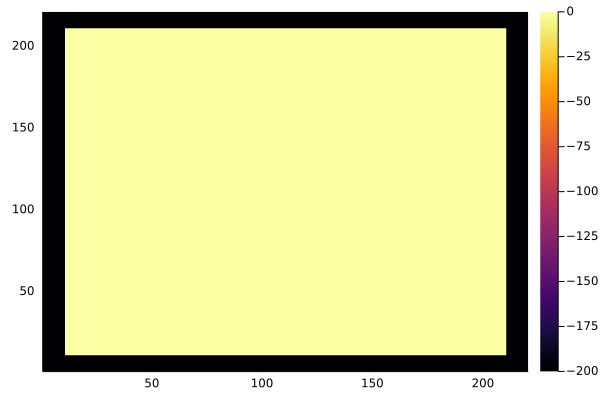

In [65]:
heatmap(real.(χννpω),clim=(-200.1,0.01))

In [55]:
heatmap(real.(Fsp_trace[3]), clims=(-20,20))

LoadError: UndefVarError: Fsp_trace not defined

In [169]:
minimum(real.(Fsp_trace[2]))

-23.78392435647617

In [171]:
maximum(real.(Fsp_trace[2]))

20.929933192254268

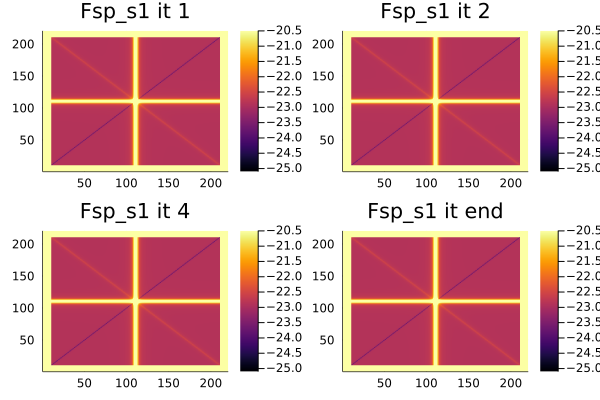

In [158]:
clim = (-25.1,-20.5)#(-3.5,-2.5)
p1 = heatmap(real.(Fsp_trace[1]), title="Fsp_s1 it 1",clim=clim)
p2 = heatmap(real.(Fsp_trace[2]), title="Fsp_s1 it 2",clim=clim)
p3 = heatmap(real.(Fsp_trace[3]), title="Fsp_s1 it 4",clim=clim)
p4 = heatmap(real.(Fsp_trace[end]), title="Fsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

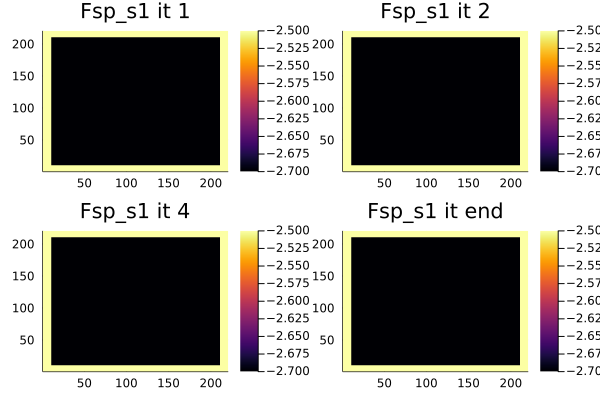

In [159]:
clim = (-2.7,-2.5)#(-3.5,-2.5)
p1 = heatmap(real.(Fsp_trace[1]), title="Fsp_s1 it 1",clim=clim)
p2 = heatmap(real.(Fsp_trace[2]), title="Fsp_s1 it 2",clim=clim)
p3 = heatmap(real.(Fsp_trace[3]), title="Fsp_s1 it 4",clim=clim)
p4 = heatmap(real.(Fsp_trace[end]), title="Fsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

In [ ]:
using LsqFit
N_min = 19
χ0_ω = real.(mapslices(x -> kintegrate(kG,x/mP.β),sum(bubble,dims=[2])[:,1,:]/mP.β,dims=1)[1,:])
χ0_ω_fit = χ0_ω[101+N_min:end]
iωn = 1im .* 2 .* ((N_min):(length(χ0_ω_fit)+N_min-1)) .* π ./ mP.β
m(t, p) = p[1] ./ t.^2 + p[2] ./ t.^4
p0 = [0.5, 0.5]
fit = curve_fit(m, iωn, χ0_ω_fit, p0)